#  FIFA 19 COMPLETE PLAYER DATASET 

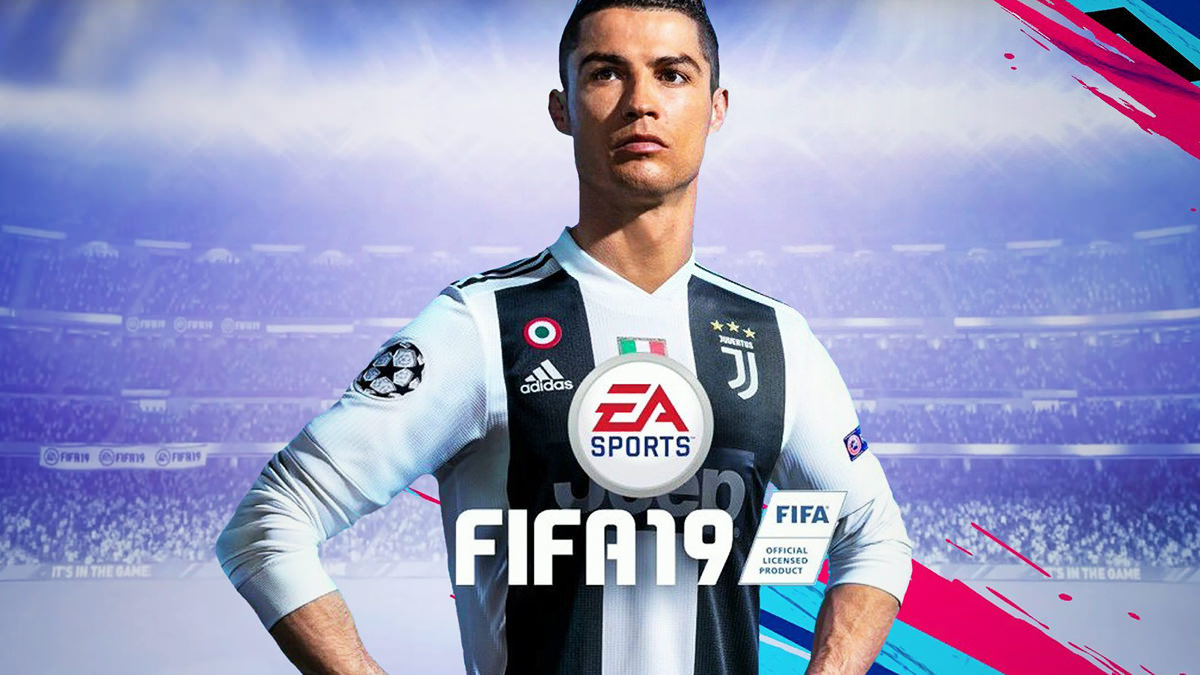

# CONTENTS :

* Description:
* Package Used
* Reading data files
* Some analysis and findings on Wage
* Preferred Foot, Overall rating and Wage
* Nationality, Overall rating and Wage
* Clubs, Overall rating and Wage
* Dose age affect, Overall rating and Wage ?
* Dose Penalties affect, Overall rating and Wage ?
* Dose Aggression affect, Overall rating and Wage ?
* Dose Height affect, Overall rating and Wage ?
* Dose Weight affect, Overall rating and Wage ?
* Findings

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import os
import time

# DESCRIPTION 


#### Football dataset is always an interesting topic to be analysed, as the fans of Football always look for updates, and informations. Football is a champion game loved by every age as it teaches discipline , work ethic, teamwork qualities etc...**

In [23]:
#Packages used here
#1.Pandas
#2.Numpy
#3.Matplot
#4.Seaborn
#5.Scipy

In [24]:
#import the dataset

In [25]:
df= pd.read_csv("D:/Tableau/Data Science/Projects/FOOTBALL/data.csv")

In [26]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [28]:
df.shape

(18207, 89)

In [29]:
# Write your code for column-wise null count here
df.isna().sum(axis=0).sort_values(ascending=False)

Loaned From    16943
LWB             2085
LM              2085
CB              2085
LCB             2085
               ...  
Potential          0
Club Logo          0
Wage               0
Special            0
Unnamed: 0         0
Length: 89, dtype: int64

In [30]:
# Write your code for row-wise null count here
df.isna().sum(axis=1).sort_values(ascending=False)

13244    75
13267    75
13240    75
13265    75
13264    75
         ..
11377     1
11376     1
11375     1
11374     1
0         1
Length: 18207, dtype: int64

In [31]:
#Removing spaces from columns
df.replace=[c.replace(' ', ' ') for c in df.columns]

In [32]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [33]:
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [34]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

#  Some Analysis and Findings on Wage:

1-- Wage is in String Data type.
2-- Some Wage values is in form €amountK (Starting with € and end with K)
3-- All the values are not having K at the end.
4-- So at first we have to remove € and K and transform Wedge value into numeric value.

In [35]:
df["Wage"].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

# Let us remove € and K

In [45]:
df.Wage= df.Wage.str.replace("€", "")
df.Wage= df.Wage.str.replace("K", "").astype('float')
df.Wage.head()

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

# # HOW MANY DIFFERENT PLAYERS ARE IN THE DATASET ?

In [46]:
df.ID.unique().shape

(18207,)

In [39]:
##So our Data set is having 18207 unique player data. It concludes that, each record in the data is data for an unique player

# Preferred Foot, Overall Rating and Wage 

In [47]:
counts_preferred_Foot = df["Preferred Foot"].value_counts()
counts_preferred_Foot = counts_preferred_Foot.reset_index()
counts_preferred_Foot.columns= ["Preferred Foot", "Count"]
print(counts_preferred_Foot)

  Preferred Foot  Count
0          Right  13948
1           Left   4211


####From analysis above, it has been found that 13948 playes use Right leg preferably and 4211 players use preferably Left leg. It can be observed from bar chart below.**

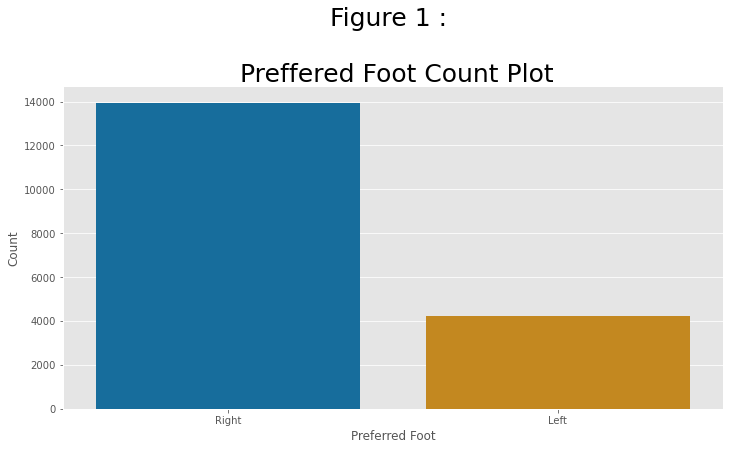

In [48]:
pt = sns.catplot(y="Count",x="Preferred Foot", 
                 data=counts_preferred_Foot,palette="colorblind",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=25);

# # Does preffered foot is having some effect on overall ranking ?

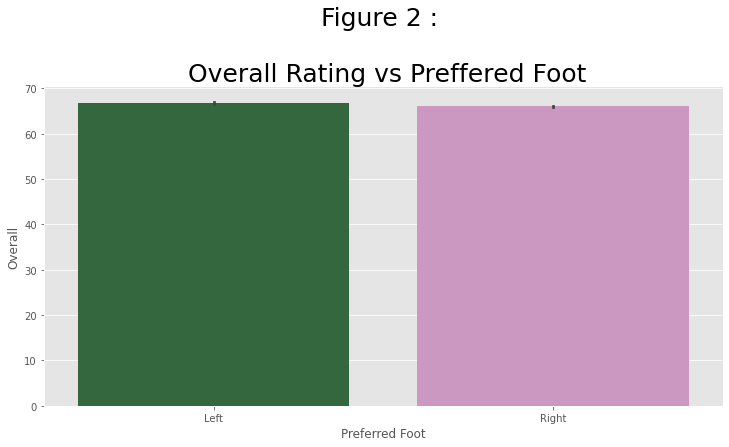

In [49]:
sns.catplot(x="Preferred Foot", y="Overall", data=df,
            aspect=2, kind="bar" , palette="cubehelix");
plt.style.use("ggplot")
plt.title("Figure 2 : \n\n Overall Rating vs Preffered Foot",
          fontsize=25);
            

### ***From figure, It is not very clear that which preffered foot get more rating. So it requires some more statistical test analysis.***

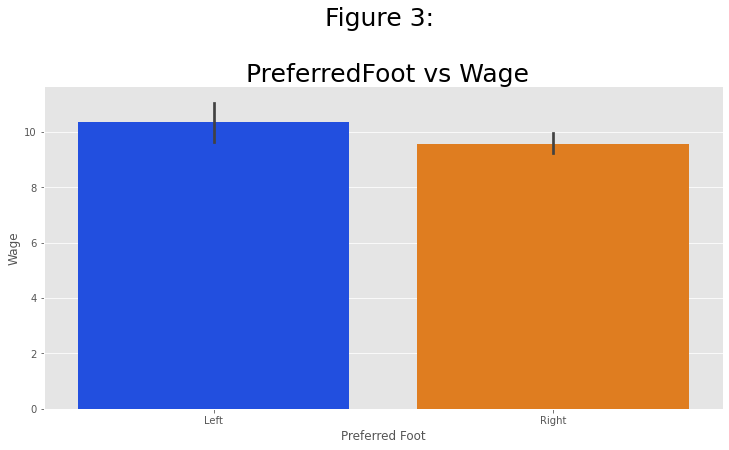

In [51]:
sns.catplot(x="Preferred Foot", y="Wage", data=df,
            aspect=2, kind="bar" , palette="bright");
plt.style.use("ggplot")
plt.title("Figure 3: \n\n PreferredFoot vs Wage",
          fontsize=25);

# Nationality, Overall rating and Wage


In [71]:
counts_Nationality = df["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality_columns = ["Nationality", "Counts"]
counts_Nationality.head()

,index,Nationality
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


In [72]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                  index  Nationality
0               England         1662
1               Germany         1198
2                 Spain         1072
3             Argentina          937
4                France          914
5                Brazil          827
6                 Italy          702
7              Colombia          618
8                 Japan          478
9           Netherlands          453
10               Sweden          397
11             China PR          392
12                Chile          391
13  Republic of Ireland          368
14               Mexico          366
15        United States          353
16               Poland          350
17               Norway          341
18         Saudi Arabia          340
19              Denmark          336


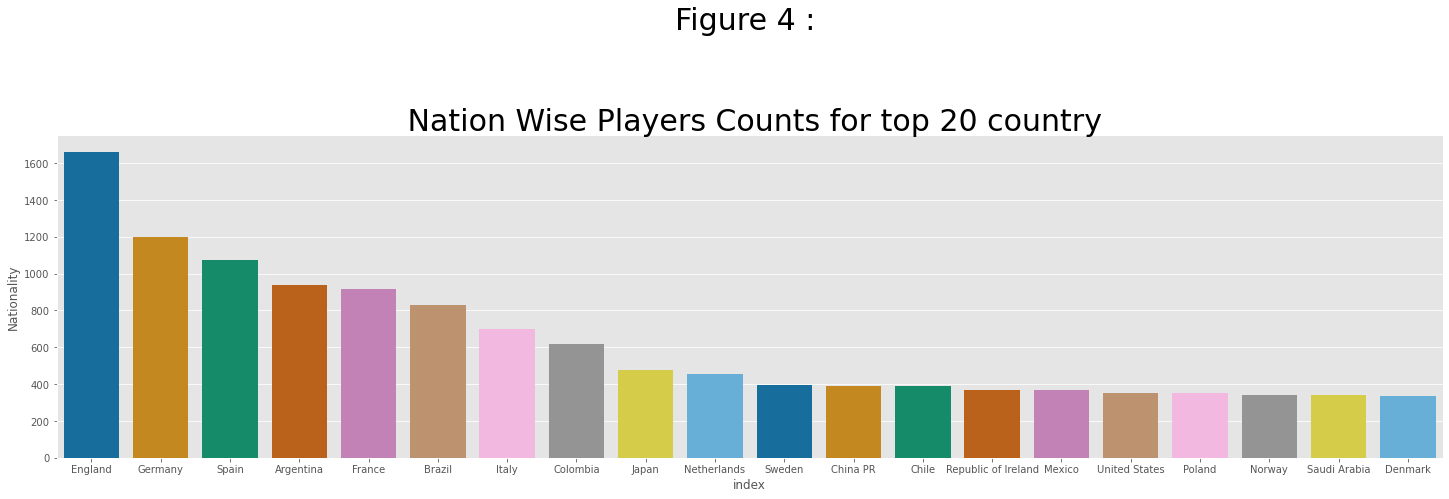

In [73]:
sns.catplot(y="Nationality", x="index" , data=counts_Nationality_top20,
            aspect=4,kind="bar",palette="colorblind")
    
plt.title("Figure 4 : \n\n\n Nation Wise Players Counts for top 20 country",
          
          fontsize=30);

In [84]:
avgwageoverall = df.groupby("Nationality", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-84-9151b3518e72>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = df.groupby("Nationality", as_index=False)["Wage","Overall"].mean()


,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492


In [85]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492
27,Central African Rep.,19.000000,73.333333
13,Belgium,18.480769,68.811538
2,Algeria,18.083333,70.633333
20,Brazil,17.778718,71.251511
47,Equatorial Guinea,17.200000,70.000000


Text(0.5, 1.0, 'Figure 5 : \n\n\n Top 10 Country with highest mean Wage')

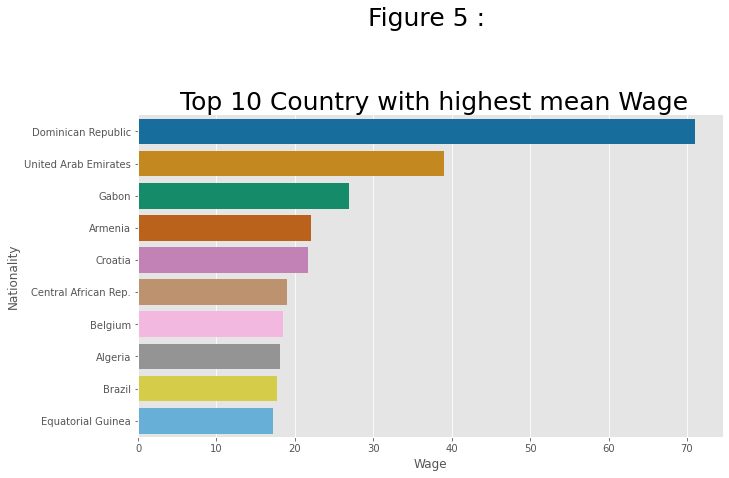

In [87]:
sns.catplot(y="Nationality",x="Wage", data=top10bywage,aspect=2,kind="bar",palette="colorblind")
plt.title("Figure 5 : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=25)

In [88]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Nationality,Wage,Overall
156,United Arab Emirates,39.000000,77.000000
27,Central African Rep.,19.000000,73.333333
77,Israel,15.857143,72.142857
42,Dominican Republic,71.000000,72.000000
147,São Tomé & Príncipe,15.000000,72.000000
116,Oman,12.000000,72.000000
26,Cape Verde,11.526316,71.631579
123,Portugal,14.310559,71.344720
150,Togo,16.000000,71.333333
20,Brazil,17.778718,71.251511


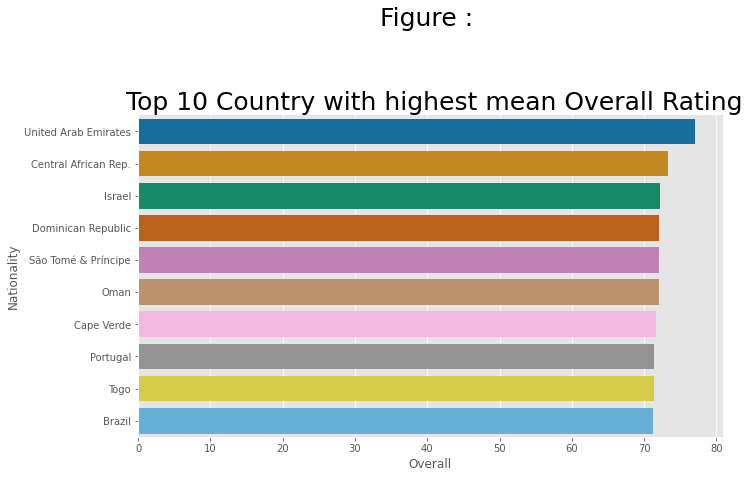

In [89]:
sns.catplot(y="Nationality",
            x="Overall",data=top10byoverall,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",
          fontsize=25);

# Findings Nationality and Overall Rating and Wage.
* In this dataset most of the players are from England which is followed by Germany.
* Nationality affect wage and overall rating of Player.

## Clubs, Overall Rating and Wage 

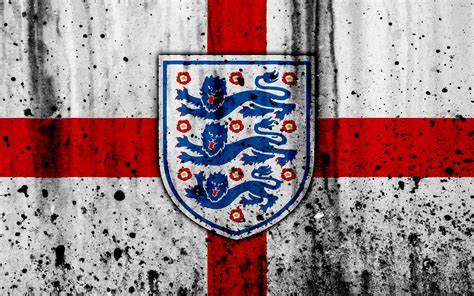

In [90]:
df.Club.unique().shape

(652,)

In [91]:
df.Club.value_counts().shape

(651,)

In [92]:
df.Club.isnull().any()

True

In [93]:
avgwageoverall = df.groupby("Club", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-93-aa6e2be219cb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = df.groupby("Club", as_index=False)["Wage","Overall"].mean()


,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424


In [94]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424
134,Chelsea,98.454545,76.787879
363,Liverpool,87.939394,76.000000
583,Tottenham Hotspur,79.484848,76.696970
214,FC Bayern München,78.827586,77.000000
52,Arsenal,78.424242,75.181818


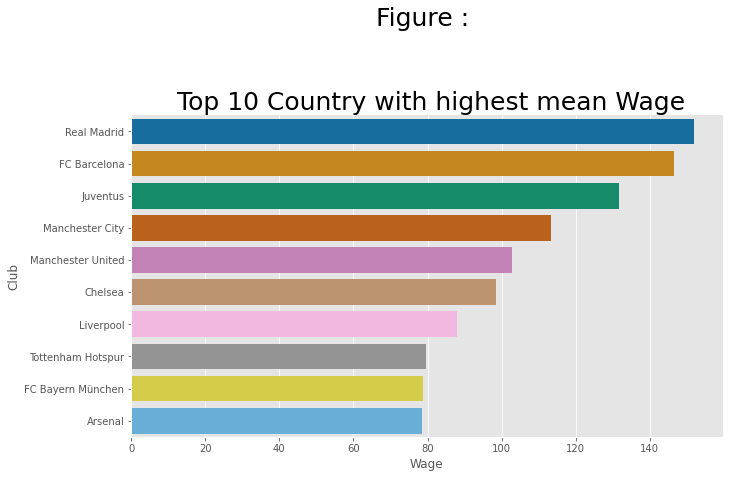

In [95]:
sns.catplot(y="Club",
            x="Wage",data=top10bywage,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",fontsize=25);

In [96]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Club,Wage,Overall
326,Juventus,131.680000,82.280000
398,Napoli,71.080000,80.000000
315,Inter,66.500000,79.750000
470,Real Madrid,152.030303,78.242424
382,Milan,72.481481,78.074074
212,FC Barcelona,146.575758,78.030303
435,Paris Saint-Germain,72.033333,77.433333
482,Roma,53.807692,77.423077
375,Manchester United,102.757576,77.242424
214,FC Bayern München,78.827586,77.000000


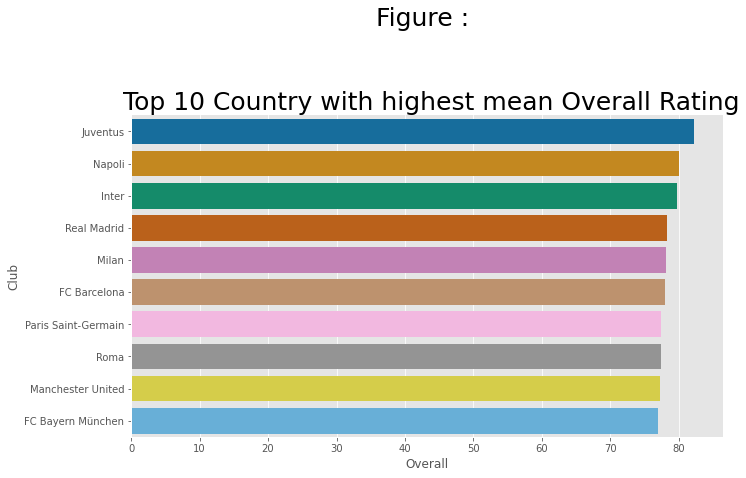

In [97]:
sns.catplot(y="Club",
            x="Overall",data=top10byoverall,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",fontsize=25);

# Findings Clubs and Overall Rating and Wage:

* There are 651 clubs.
* Club column has missing value too.
* Club is having very distinct affect on wage.
* Club is not having very sharp impact on overall rating. 

# Does Age affect, Overall Rating and Wage ?


In [98]:
df.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

In [99]:
df.Age.isnull().any()

False

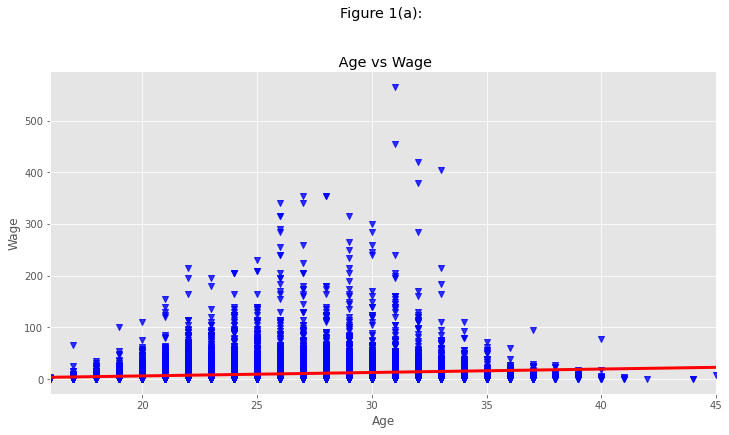

In [102]:
sns.lmplot(x="Age", y="Wage",data=df,markers="v",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure 1(a): \n\n\n Age vs Wage");

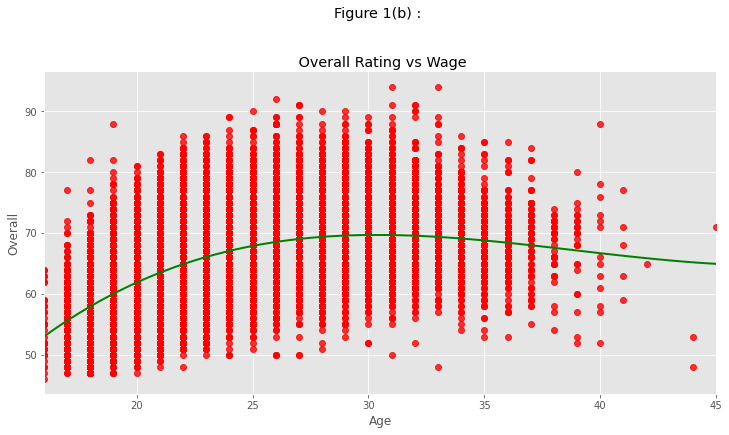

In [103]:
sns.lmplot(x="Age", y="Overall",data=df,markers="o",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":2,"color":"green"},aspect=2);

plt.title("Figure 1(b) : \n\n\n Overall Rating vs Wage");


# Does Penalties affect, Overall rating and Wage ?

In [115]:
df.Penalties.value_counts()

45.0    492
55.0    488
49.0    480
48.0    473
58.0    471
       ... 
87.0      3
7.0       1
92.0      1
91.0      1
5.0       1
Name: Penalties, Length: 87, dtype: int64

In [116]:
df.Penalties.head()

0    75.0
1    85.0
2    81.0
3    40.0
4    79.0
Name: Penalties, dtype: float64

In [117]:
df.Penalties.unique()

array([75., 85., 81., 40., 79., 86., 82., 11., 88., 73., 50., 54., 90.,
       25., 27., 60., 47., 83., 70., 61., 66., 76., 67., 68., 59., 23.,
       22., 33., 78., 69., 71., 17., 62., 72., 43., 64., 77., 89., 58.,
       41., 56., 44., 55., 80., 84., 26., 45., 18., 46., 63., 49., 65.,
       57., 38., 32., 74., 91., 31., 16., 21., 20., 15., 24., 37., 53.,
       52., 39., 92., 13., 14., 48., 34., 36., 51., 19., 30., 42., 29.,
       10.,  9., 87., 35., 12., 28., nan,  7.,  5.,  8.])

In [118]:
df.Penalties.isnull().any()

True

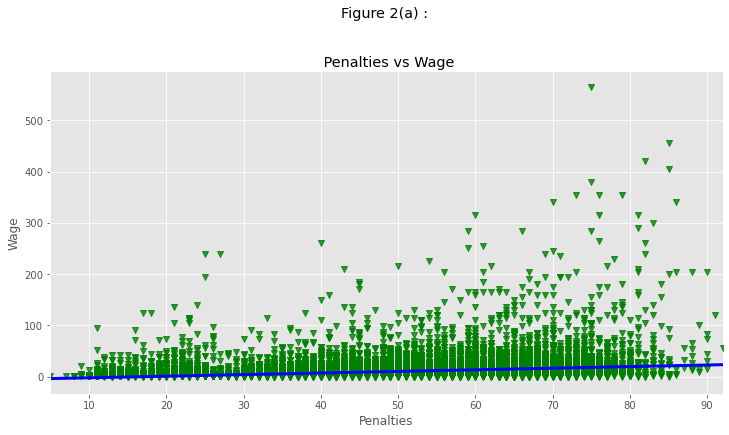

In [119]:
sns.lmplot(x="Penalties", y="Wage",data=df,markers="v",
            scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"blue"},aspect=2);
plt.title("Figure 2(a) : \n\n\n Penalties vs Wage");

# Findings Penalties and Overall Rating and Wage:
* Penalties lies between 11 to 95.
* Penalties of a Player does not affect much on their Wage.
* As Penalties increase the Overall rating increases.

# Does Aggression affect, Overall rating and Wage ?

In [120]:
df.Aggression.head()

0    48.0
1    63.0
2    56.0
3    38.0
4    76.0
Name: Aggression, dtype: float64

In [121]:
df.Aggression.value_counts()

65.0    516
68.0    514
70.0    489
60.0    464
58.0    458
       ... 
14.0     11
94.0      8
11.0      5
93.0      3
95.0      1
Name: Aggression, Length: 85, dtype: int64

In [122]:
df.Aggression.isnull().any()

True

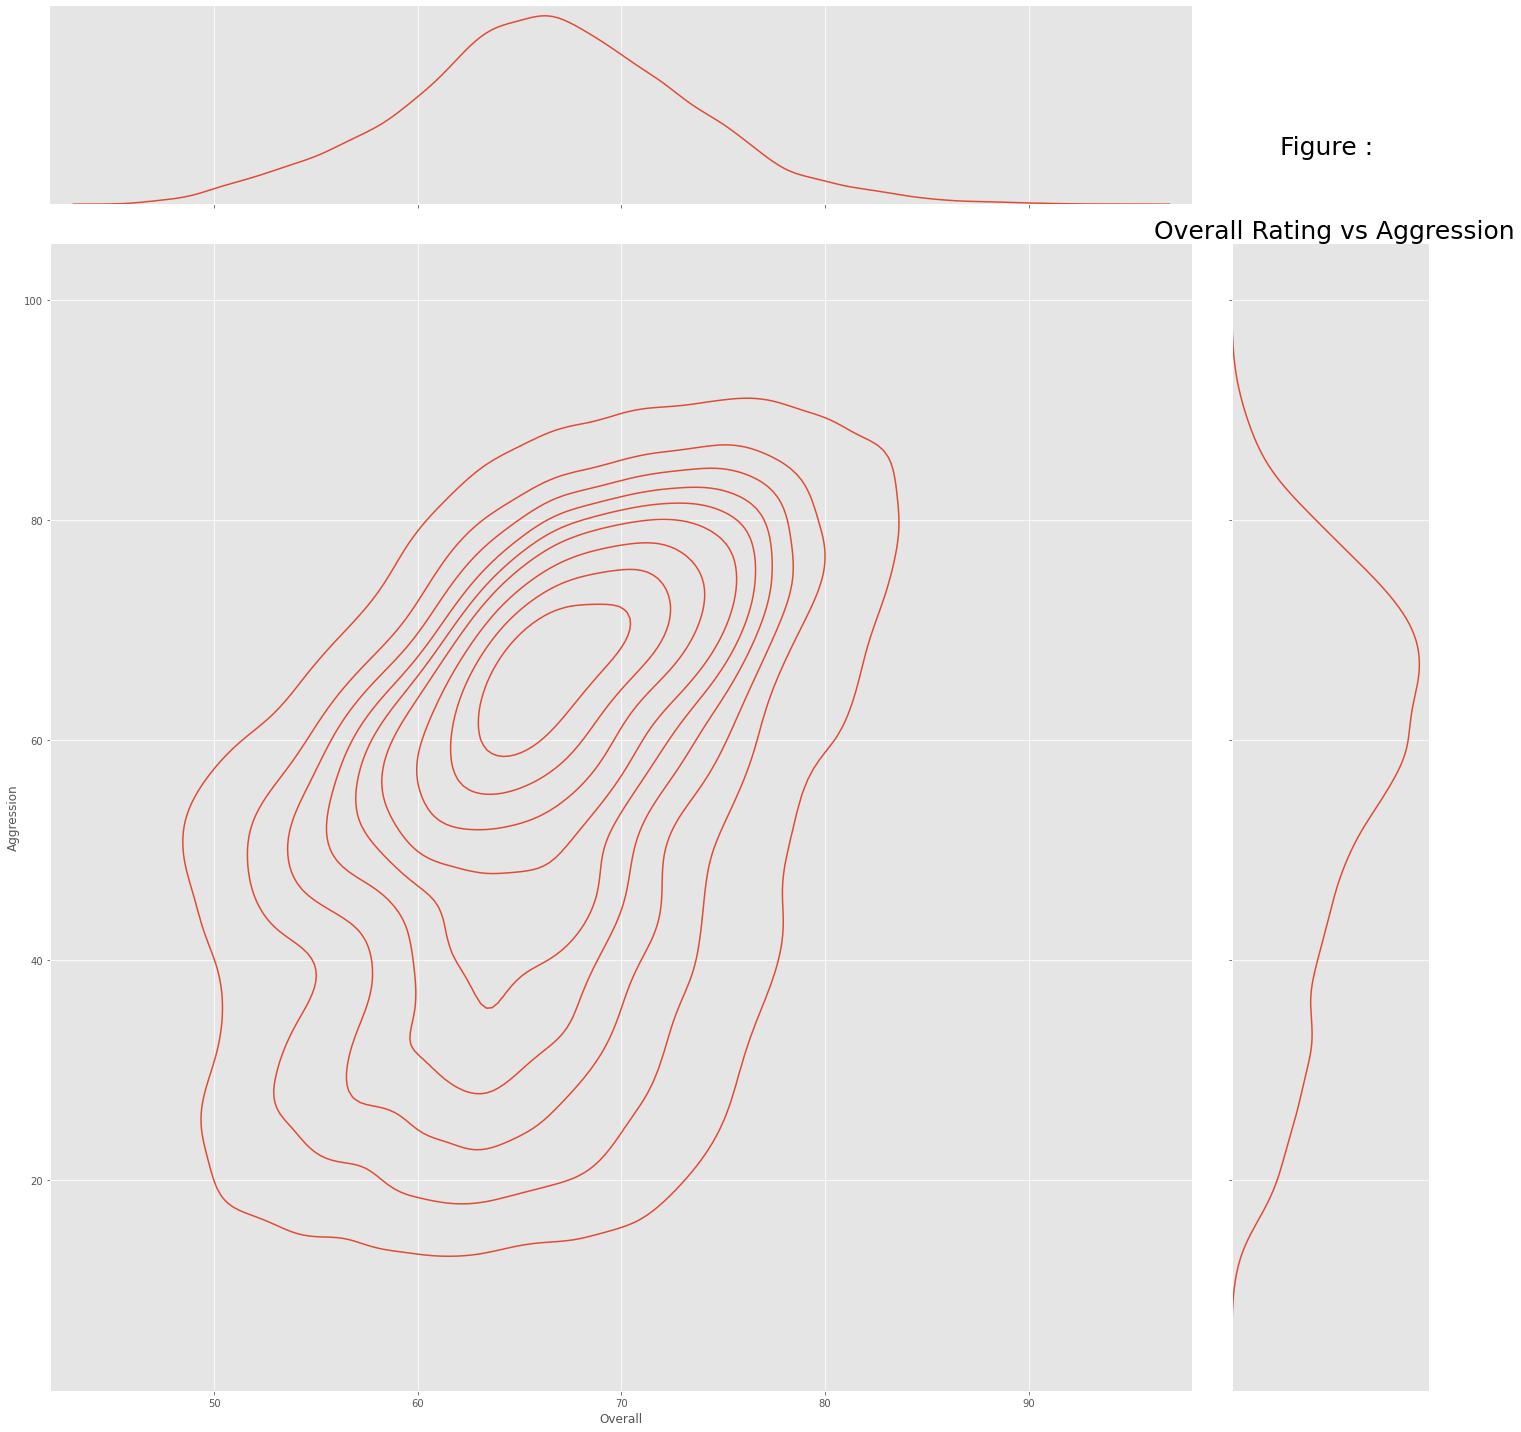

In [124]:
sns.jointplot(x="Overall", y="Aggression",data=df,
            
            kind="kde",height=20,palette="colorblind");
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=25);

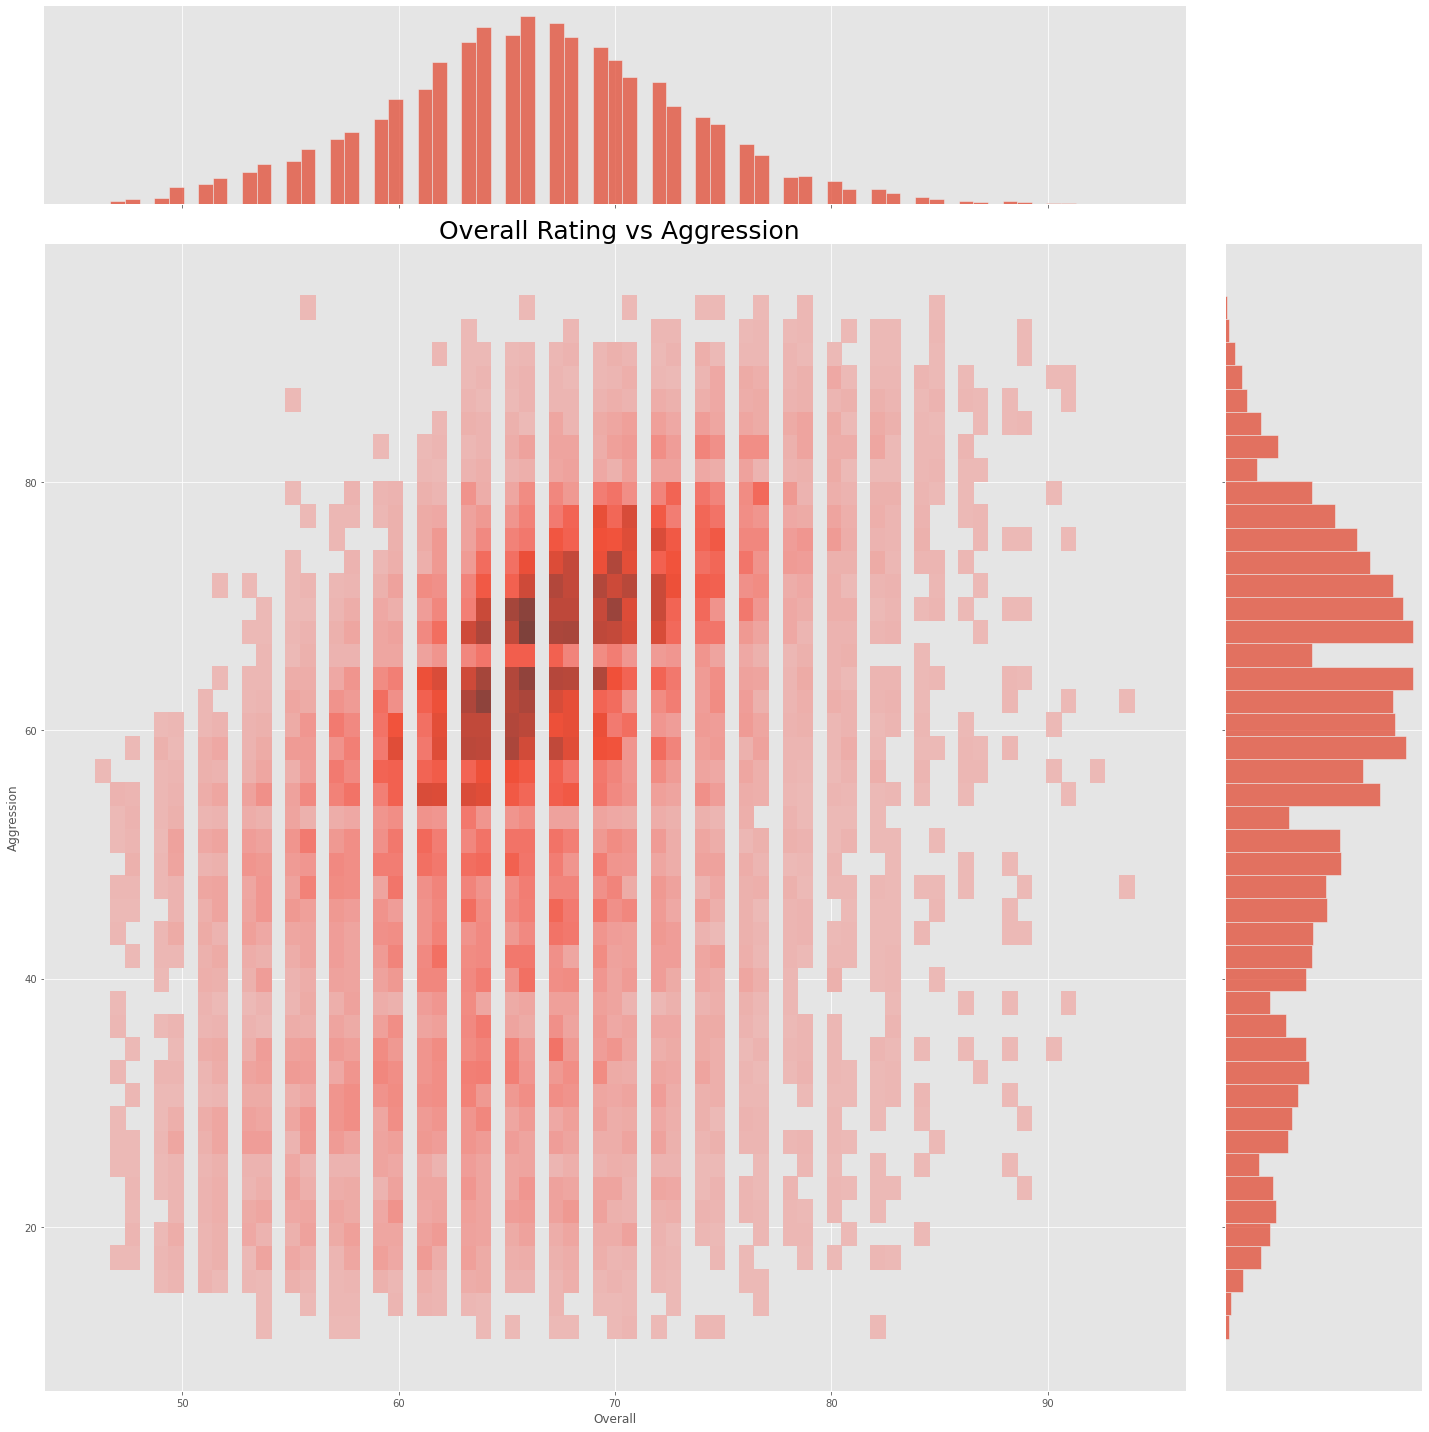

In [125]:
sns.jointplot(x="Overall", y="Aggression",data=df,
            
            kind="hist",height=20,palette="colorblind");
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=25);

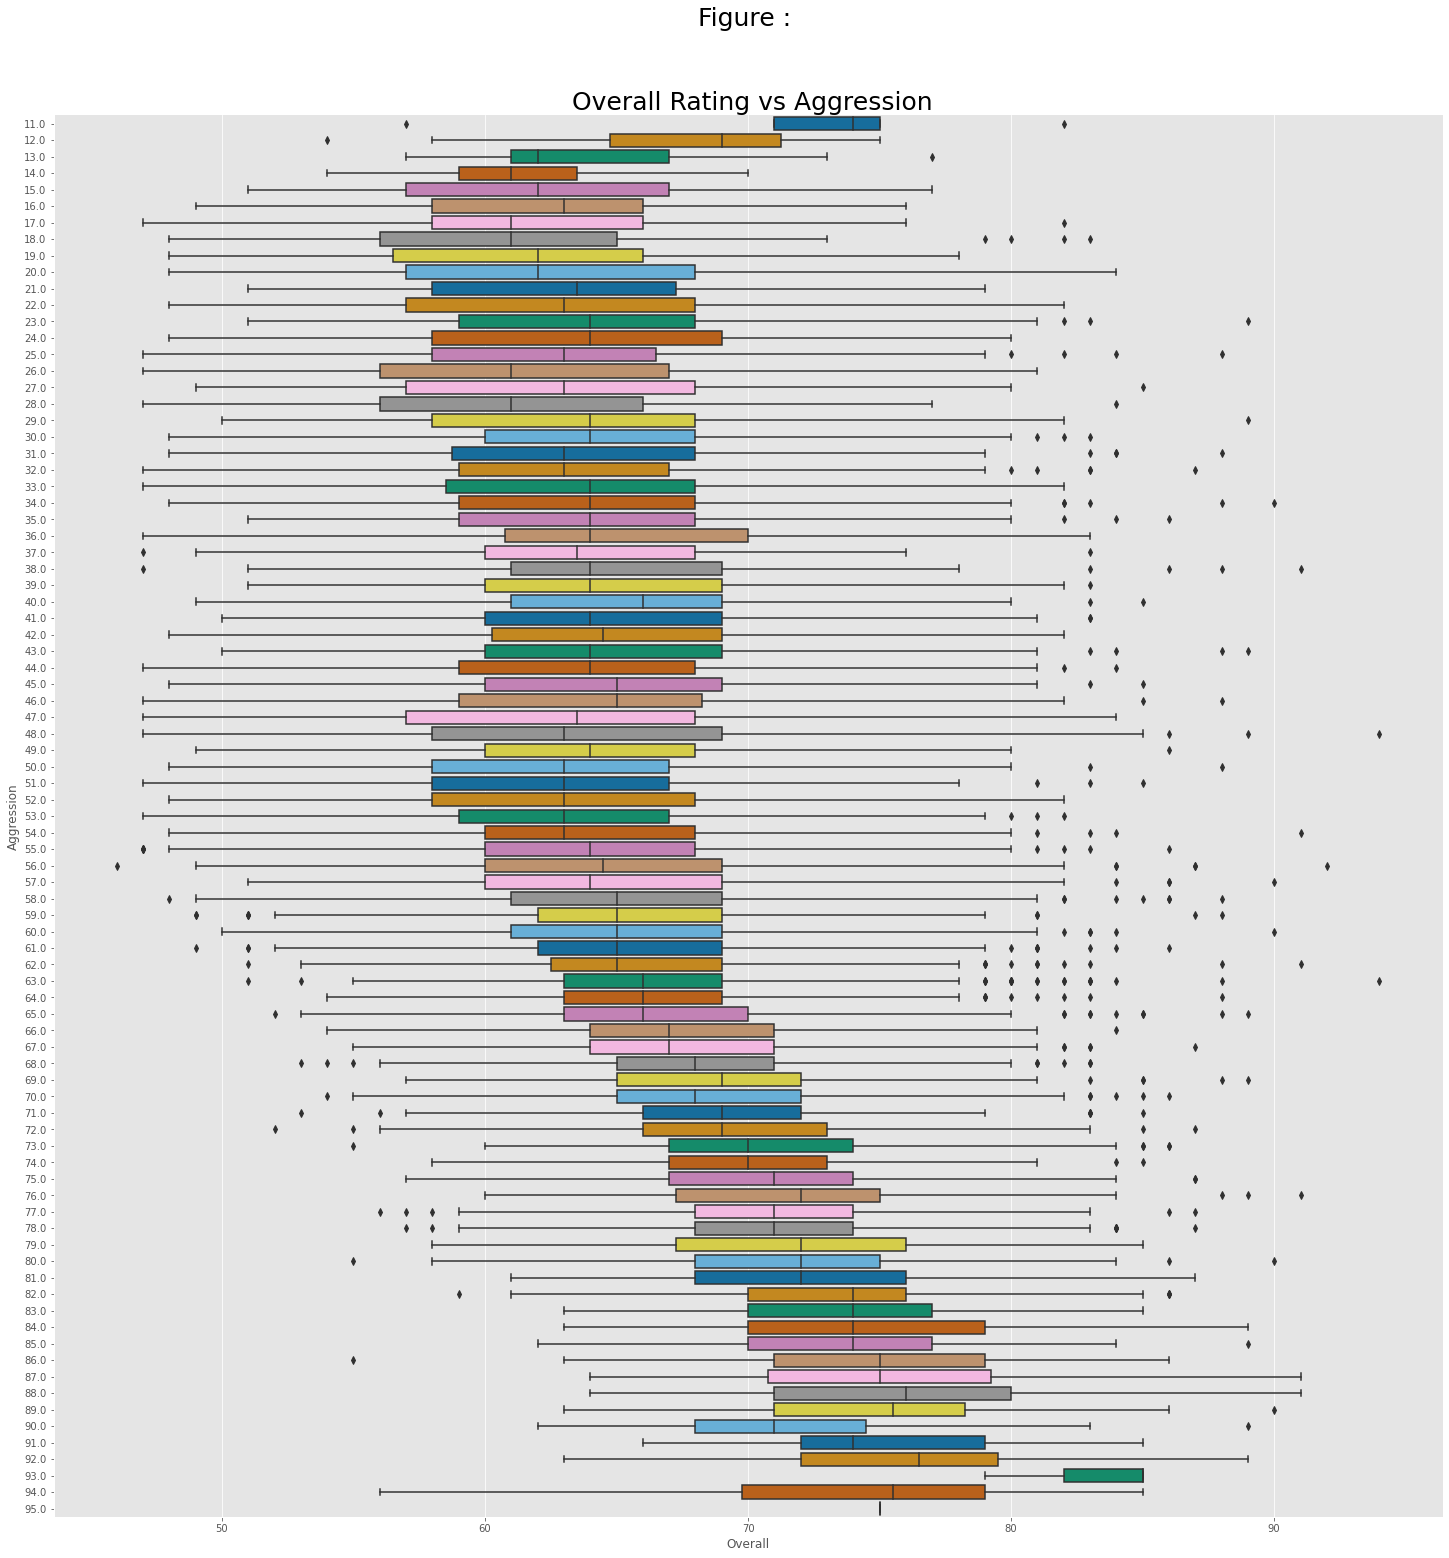

In [126]:
sns.catplot(x="Overall", y="Aggression",data=df,
            orient="h",
            kind="box",height=20,palette="colorblind");
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=25);

# Findings Aggression and Overall Rating and Wage.
* Aggression lies between 11 to 95.
* Aggression of a Player does not affect much on their Wage.
* As Aggression increase the Overall rating increases.

# Does Height,Weight affect Overall Rating and Wage ?

In [128]:
df.Height.head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [127]:
df.Height.value_counts()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [129]:
df.Height.isnull().any()

True

In [130]:
df.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [131]:
avgwageoverall = df.groupby("Height", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-131-71b409decc23>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = df.groupby("Height", as_index=False)["Wage","Overall"].mean()


,Height,Wage,Overall
5,5'4,12.100000,67.400000
15,6'4,11.387183,66.951936
17,6'6,11.247312,66.709677
13,6'2,10.917122,67.018859
9,5'8,10.423890,66.344609


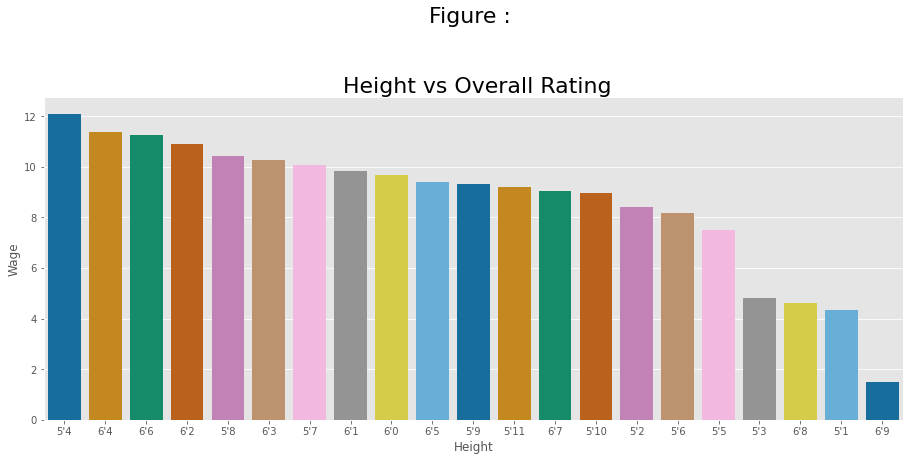

In [132]:
sns.catplot(x="Height", y="Wage",data=avgwageoverall,
            kind="bar",aspect=2.5,palette="colorblind");
plt.title("Figure : \n\n\n Height vs Overall Rating",fontsize=22);

# Findings Height and Overall Rating and Wage.
* There are 20 unique heights of players.
* Minimum height of player is 5.1'.
* Maximum height of players height is 6.9'.
* Height is having missing value too.
* Height is having effect on wage but not in regular fashion.

# So the overall Findings are:

* Preffered foot has not much effect on either wage or overall rating.
* Nationality affect wage and overall rating of Player.
* Club is having very distinct affect on wage.
* Club is not having very sharp impact on overall rating.
* Age of a Player does not affect much on their Wage.
* As Age increase the Overall rating increases.
* Penalties of a Player does not affect much on their Wage.
* As Penalties increase the Overall rating increases.
* Aggression of a Player does not affect much on their Wage.
* As Aggression increase the Overall rating increases.
* Weight of a Player does not affect much on their Wage.